In [1]:
import numpy as np
import time
import pandas as pd
import math
import matplotlib.pyplot as plt
from collections import deque

In [2]:
infinity = float('inf')

In [3]:
len(graph.keys())

NameError: name 'graph' is not defined

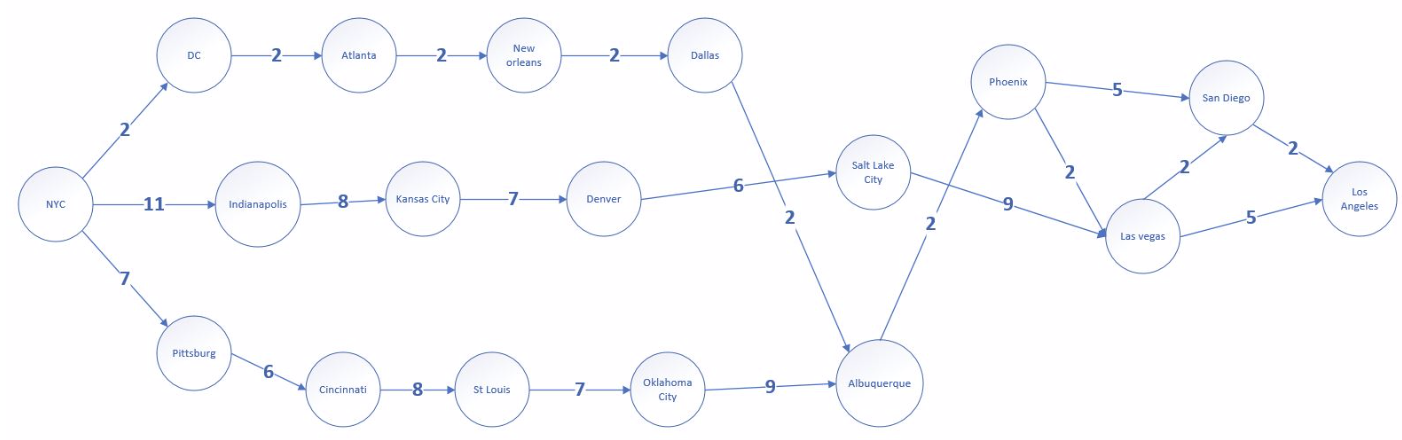

In [4]:
def reset_graph():
    graph={}
    graph['nyc']={}
    graph['nyc']['dc']=2
    graph['nyc']['indianapolis']=11
    graph['nyc']['pittsburgh']=7

    graph['dc']={}
    graph['indianapolis']={}
    graph['pittsburgh']={}
    graph['dc']['atlanta']=2
    graph['indianapolis']['kc']=8
    graph['pittsburgh']['cincinnati']=6

    graph['atlanta']={}
    graph['kc']={}
    graph['cincinnati']={}
    graph['atlanta']['nola']=2
    graph['kc']['Denver']=7
    graph['cincinnati']['stlouis']=8

    graph['nola']={}
    graph['Denver']={}
    graph['stlouis']={}
    graph['nola']['dallas']=2
    graph['Denver']['saltlake']=6
    graph['stlouis']['okc']=7

    graph['dallas']={}
    graph['saltlake']={}
    graph['okc']={}
    graph['dallas']['albuquerque']=2
    graph['saltlake']['lasvegas']=9
    graph['okc']['albuquerque']=9

    graph['albuquerque']={}
    graph['lasvegas']={}
    graph['albuquerque']['phoenix']=2
    graph['lasvegas']['sandiego']=2
    graph['lasvegas']['la']=5

    graph['phoenix']={}
    graph['sandiego']={}
    graph['phoenix']['sandiego']=5
    graph['phoenix']['lasvegas']=2
    graph['sandiego']['la']=2
    graph['la']={}
    return graph

In [5]:
reset_graph()

{'nyc': {'dc': 2, 'indianapolis': 11, 'pittsburgh': 7},
 'dc': {'atlanta': 2},
 'indianapolis': {'kc': 8},
 'pittsburgh': {'cincinnati': 6},
 'atlanta': {'nola': 2},
 'kc': {'Denver': 7},
 'cincinnati': {'stlouis': 8},
 'nola': {'dallas': 2},
 'Denver': {'saltlake': 6},
 'stlouis': {'okc': 7},
 'dallas': {'albuquerque': 2},
 'saltlake': {'lasvegas': 9},
 'okc': {'albuquerque': 9},
 'albuquerque': {'phoenix': 2},
 'lasvegas': {'sandiego': 2, 'la': 5},
 'phoenix': {'sandiego': 5, 'lasvegas': 2},
 'sandiego': {'la': 2},
 'la': {}}

In [6]:
def reset_costs():
    costs={}
    costs['dc']=2
    costs['indianapolis']=11
    costs['pittsburgh']=7

    costs['atlanta']=infinity
    costs['kc']=infinity
    costs['cincinnati']=infinity

    costs['nola']=infinity
    costs['Denver']=infinity
    costs['stlouis']=infinity

    costs['dallas']=infinity
    costs['saltlake']=infinity
    costs['okc']=infinity

    costs['albuquerque']=infinity
    costs['lasvegas']=infinity

    costs['phoenix']=infinity
    costs['sandiego']=infinity
    costs['la']=infinity
    return costs

In [7]:
reset_costs()

{'dc': 2,
 'indianapolis': 11,
 'pittsburgh': 7,
 'atlanta': inf,
 'kc': inf,
 'cincinnati': inf,
 'nola': inf,
 'Denver': inf,
 'stlouis': inf,
 'dallas': inf,
 'saltlake': inf,
 'okc': inf,
 'albuquerque': inf,
 'lasvegas': inf,
 'phoenix': inf,
 'sandiego': inf,
 'la': inf}

In [8]:
def reset_parents():
    parents={}
    parents['dc']='nyc'
    parents['indianapolis']='nyc'
    parents['pittsburgh']='nyc'

    parents['atlanta']=None
    parents['kc']=None
    parents['cincinnati']=None

    parents['nola']=None
    parents['Denver']=None
    parents['stlouis']=None

    parents['dallas']=None
    parents['saltlake']=None
    parents['okc']=None

    parents['albuquerque']=None
    parents['lasvegas']=None

    parents['phoenix']=None
    parents['sandiego']=None
    parents['la']=None
    return parents

In [9]:
reset_parents()

{'dc': 'nyc',
 'indianapolis': 'nyc',
 'pittsburgh': 'nyc',
 'atlanta': None,
 'kc': None,
 'cincinnati': None,
 'nola': None,
 'Denver': None,
 'stlouis': None,
 'dallas': None,
 'saltlake': None,
 'okc': None,
 'albuquerque': None,
 'lasvegas': None,
 'phoenix': None,
 'sandiego': None,
 'la': None}

In [10]:
def reset_structs():
    graph = reset_graph()
    costs = reset_costs()
    parents = reset_parents()
    processed = deque()
    return graph, costs, parents, processed

In [11]:
graph, costs, parents, processed = reset_structs()

In [13]:
def search(start , finish):
    
    i = 0 # pop deque
    j = 0 # append deque
    k = 0 # search hash
    search_queue = deque()
    from_queue = deque()

    search_queue += graph[start]
    k +=1
    j +=1
    for _ in graph[start]:
        from_queue += [start]
    k +=1
    j +=1
    sourced = deque()
    searched = deque()
    hours = deque()

    print('leaving',start)

    while search_queue:
        
        city = search_queue.popleft()
        i +=1
        from_city = from_queue.popleft()
        i +=1
        
        if not city in searched:
            
            print(from_city,'to',city, graph[from_city][city])
            
            sourced.append(from_city)
            j +=1
            searched.append(city)
            j +=1
            hours.append(graph[from_city][city])
            j +=1
            k +=1
            
            if city==finish:
                print ('we have arrived in', city)
                return sourced, searched, hours, i, j, k
            else:
                search_queue += graph[city]
                k +=1
                for _ in graph[city]:
                    from_queue += [city]
                    
    return sourced, searched, hours, i, j, k

In [14]:
start = time.time()
left, arrived, hours, pop_BF, append_BF, search_BF = search('nyc','la')
end = time.time()
elapsed_BF = end-start


leaving nyc
nyc to dc 2
nyc to indianapolis 11
nyc to pittsburgh 7
dc to atlanta 2
indianapolis to kc 8
pittsburgh to cincinnati 6
atlanta to nola 2
kc to Denver 7
cincinnati to stlouis 8
nola to dallas 2
Denver to saltlake 6
stlouis to okc 7
dallas to albuquerque 2
saltlake to lasvegas 9
albuquerque to phoenix 2
lasvegas to sandiego 2
lasvegas to la 5
we have arrived in la


In [15]:
pop_BF, append_BF, search_BF, pop_BF + append_BF + search_BF

(36, 53, 35, 124)

In [16]:
routes = {'left': left, 'arrived':arrived, 'hours': hours}
routes = pd.DataFrame(routes)
routes

,left,arrived,hours
0,nyc,dc,2
1,nyc,indianapolis,11
2,nyc,pittsburgh,7
3,dc,atlanta,2
4,indianapolis,kc,8
5,pittsburgh,cincinnati,6
6,atlanta,nola,2
7,kc,Denver,7
8,cincinnati,stlouis,8
9,nola,dallas,2


In [17]:
leg = []
out_of = []
in_to = []
hrs = []
print(left[-1],arrived[-1])
leg.append(len(left))
out_of.append(left[-1])
in_to.append(arrived[-1])
hrs.append(hours[-1])
i = arrived.index(left[-1])
while i>0:
    leg.append(i)
    out_of.append(left[i])
    print(left[i], arrived[i])
    in_to.append(arrived[i])
    hrs.append(hours[i])
    if left[i] == left[0]:
        break
    i = arrived.index(left[i])

lasvegas la
saltlake lasvegas
Denver saltlake
kc Denver
indianapolis kc
nyc indianapolis


In [18]:
route_BF = {'leg':leg,'left': out_of, 'arrived': in_to, 'hours': hrs}
route_BF = pd.DataFrame(data=route_BF).sort_values(by='leg').drop('leg', axis=1).reset_index(drop=True)
msg_BF = str('This is the route from NYC to LA \nwith fewest hops: '+ str(len(route_BF.hours))+ ', \nbut takes more hours:' + str(route_BF.hours.sum()))
print(msg_BF)
route_BF

This is the route from NYC to LA 
with fewest hops: 6, 
but takes more hours:46


,left,arrived,hours
0,nyc,indianapolis,11
1,indianapolis,kc,8
2,kc,Denver,7
3,Denver,saltlake,6
4,saltlake,lasvegas,9
5,lasvegas,la,5


In [19]:
def find_lowest_cost_node(costs):
    lowest_cost = float('inf')
    lowest_cost_node = None
    k=0 # search
    for node in costs:  
        cost = costs[node]
        k=+1
        if cost < lowest_cost and node not in processed:    
            k=+1
            lowest_cost = cost   
            lowest_cost_node = node 
    return lowest_cost_node, k 

In [20]:
graph, costs, parents, processed = reset_structs()

start = time.time()

node, k = find_lowest_cost_node(costs) 
# k= number of hash searches
i =0 # pops count
j =0 # array appends
while node is not None:
    cost = costs[node]
    k+=1
    neighbors = graph[node]
    k+=1
    for n in neighbors.keys():
        new_cost = cost + neighbors[n]
        k+=1
        if costs[n] > new_cost:
            k+=1
            costs[n] = new_cost
            k+=1
            parents[n] = node
            k+=1
    processed.append(node)
    j+=1
    node, _ = find_lowest_cost_node(costs)  
    k+=_
end = time.time()
elapsed_DA = end-start

In [21]:
i,j,k # pops, appends, hash searches

(0, 17, 118)

In [22]:
print('shortest time to la is', costs['la'], 'hours.')

shortest time to la is 18 hours.


In [23]:
embark = list(parents.values())
disembark = list(parents.keys())
routes = {'leave':embark, 'arrive': disembark}
parents, routes

({'dc': 'nyc',
  'indianapolis': 'nyc',
  'pittsburgh': 'nyc',
  'atlanta': 'dc',
  'kc': 'indianapolis',
  'cincinnati': 'pittsburgh',
  'nola': 'atlanta',
  'Denver': 'kc',
  'stlouis': 'cincinnati',
  'dallas': 'nola',
  'saltlake': 'Denver',
  'okc': 'stlouis',
  'albuquerque': 'dallas',
  'lasvegas': 'phoenix',
  'phoenix': 'albuquerque',
  'sandiego': 'lasvegas',
  'la': 'sandiego'},
 {'leave': ['nyc',
   'nyc',
   'nyc',
   'dc',
   'indianapolis',
   'pittsburgh',
   'atlanta',
   'kc',
   'cincinnati',
   'nola',
   'Denver',
   'stlouis',
   'dallas',
   'phoenix',
   'albuquerque',
   'lasvegas',
   'sandiego'],
  'arrive': ['dc',
   'indianapolis',
   'pittsburgh',
   'atlanta',
   'kc',
   'cincinnati',
   'nola',
   'Denver',
   'stlouis',
   'dallas',
   'saltlake',
   'okc',
   'albuquerque',
   'lasvegas',
   'phoenix',
   'sandiego',
   'la']})

In [24]:
leg = []
out_of = []
in_to = []
hrs = []
print(left[-1],disembark[-1], graph[embark[-1]][disembark[-1]])
leg.append(len(embark))
out_of.append(embark[-1])
in_to.append(disembark[-1])
hrs.append(graph[embark[-1]][disembark[-1]])
i = disembark.index(embark[-1])
while i>=0:
    leg.append(i)
    out_of.append(embark[i])
    print(embark[i], disembark[i], graph[embark[i]][disembark[i]])
    in_to.append(disembark[i])
    hrs.append(graph[embark[i]][disembark[i]])
    if embark[i] == embark[0]:
        break
    i = disembark.index(embark[i])

lasvegas la 2
lasvegas sandiego 2
phoenix lasvegas 2
albuquerque phoenix 2
dallas albuquerque 2
nola dallas 2
atlanta nola 2
dc atlanta 2
nyc dc 2


In [25]:
route_DA = {'leg':leg,'left': out_of, 'arrived': in_to, 'hours': hrs}
route_DA = pd.DataFrame(data=route_DA).sort_values(by='leg').drop('leg', axis=1).reset_index(drop=True)
msg_DA = str('This is the route from NYC to LA \nwith '+ str(len(route_DA.hours))+ ' hops, \nbut only takes ' + str(route_DA.hours.sum()) + ' hours.')
print(msg_DA)
route_DA

This is the route from NYC to LA 
with 9 hops, 
but only takes 18 hours.


,left,arrived,hours
0,nyc,dc,2
1,dc,atlanta,2
2,atlanta,nola,2
3,nola,dallas,2
4,dallas,albuquerque,2
5,phoenix,lasvegas,2
6,albuquerque,phoenix,2
7,lasvegas,sandiego,2
8,sandiego,la,2


AxesSubplot(0.125,0.125;0.775x0.755)


,BF,Dyjkstra
Time,0.00588,0.000255


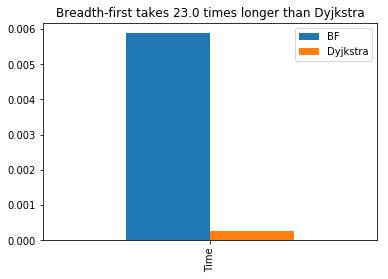

In [26]:
times = {'BF': elapsed_BF, 'Dyjkstra': elapsed_DA}
times = pd.DataFrame(times, index = ['Time'])
ratio = str(round(elapsed_BF/elapsed_DA,1))
title = str('Breadth-first takes ' + ratio + ' times longer than Dyjkstra')
print(times.plot.bar(title=title))
times

In [27]:
print(msg_BF)
route_BF

This is the route from NYC to LA 
with fewest hops: 6, 
but takes more hours:46


,left,arrived,hours
0,nyc,indianapolis,11
1,indianapolis,kc,8
2,kc,Denver,7
3,Denver,saltlake,6
4,saltlake,lasvegas,9
5,lasvegas,la,5


In [28]:
print(msg_DA)
route_DA

This is the route from NYC to LA 
with 9 hops, 
but only takes 18 hours.


,left,arrived,hours
0,nyc,dc,2
1,dc,atlanta,2
2,atlanta,nola,2
3,nola,dallas,2
4,dallas,albuquerque,2
5,phoenix,lasvegas,2
6,albuquerque,phoenix,2
7,lasvegas,sandiego,2
8,sandiego,la,2


In [29]:
V=18
E=21
bigO_DA = E*np.log2(V)
bigO_BF = E+V
bigO_BF, bigO_DA, bigO_BF/bigO_DA

(39, 87.56842503028855, 0.4453660093408156)

In [30]:
def search_2(start, finish):
    search_queue = deque()
    search_queue += graph[start]
    print(search_queue)
    # This array is how you keep track of which people you've searched before.
    searched = []
    while search_queue:
        person = search_queue.popleft()
        # Only search this person if you haven't already searched them.
        if not person in searched:
            if person==finish:
                print (person + " is a mango seller!")
                return True
            else:
                search_queue += graph[person]
                # Marks this person as searched
                searched.append(person)
    return False



In [32]:
reset_structs()
start = time.time()
search_2('nyc','la')
end = time.time()
elapsed_BF2 = end-start
elapsed_BF2/elapsed_DA

deque(['dc', 'indianapolis', 'pittsburgh'])
la is a mango seller!


1.3635514018691588